In [1]:

import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
from example2g import solve_flux_for_d_value

In [3]:
# Define sampling range for uncertain parameter

Ns = 300+1

#d_values = np.linspace(0.5, 2.0, Ns)  # Ns samples between 0.5 and 2.

random_numbers = [random.uniform(0.5, 2.0) for _ in range(Ns)]

flux_solutions = []  # Store solutions for each sampled d value

d_values = np.asarray(random_numbers)

for i,d_val in enumerate(d_values):

   x, flux = solve_flux_for_d_value(d_val)

   flux_solutions.append( flux ) # Store each flux solution

In [4]:
import geim

In [5]:
snapshots = np.transpose(np.asarray(flux_solutions), (1, 2, 0))
Nx, Nfield, Nsnap = np.shape(snapshots)

rank = 10

indexes_of_snapshots = np.arange(0, Nsnap, 1, dtype= int)
indexes_selected_snapshot = np.random.choice(indexes_of_snapshots, size= 200, replace= False)

indexes_unselected_snapshot = []
for i in indexes_of_snapshots:
    flag = False
    for j in indexes_selected_snapshot:
        if i == j:
            flag = True
            break
            
        
    if flag == False:
        indexes_unselected_snapshot.append(i)

unselected_snapshot_indexes = np.array(indexes_unselected_snapshot)

In [6]:
fixed_snapshot_indexes = np.asarray([83, 287, 87, 49, 102, 112, 162, 84, 137, 228, 9, 121, 61, 161, 284, 217, 39, 171, 91, 38, 45, 153, 167, 224, 124, 297, 111, 145, 251, 44, 142, 195, 292, 265, 50, 78, 64, 6, 75, 89, 152, 203, 164, 56, 22, 283, 175, 275, 272, 76, 77, 263, 97, 141, 81, 107, 147, 138, 127, 33, 178, 241, 273, 282, 206, 94, 95, 296, 24, 166, 103, 29, 65, 148, 116, 125, 210, 243, 70, 259, 73, 10, 199, 18, 17, 1, 130, 3, 188, 92, 225, 136, 37, 54, 233, 262, 215, 63, 285, 237, 299, 254, 23, 181, 235, 244, 35, 168, 234, 226, 256, 66, 280, 172, 85, 41, 11, 32, 247, 269, 160, 183, 27, 4, 158, 192, 258, 295, 274, 8, 190, 79, 144, 135, 214, 28, 60, 208, 93, 67, 298, 230, 69, 197, 115, 106, 58, 177, 108, 31, 223, 290, 43, 213, 74, 117, 98, 257, 293, 200, 182, 222, 132, 221, 159, 59, 187, 242, 232, 0, 53, 219, 300, 211, 281, 42, 276, 270, 194, 14, 120, 239, 36, 88, 2, 289, 140, 163, 248, 149, 134, 252, 40, 68, 294, 191, 227, 212, 176, 184])
fixed_test_snap_index = 261
print(fixed_snapshot_indexes)
print(fixed_test_snap_index)

[ 83 287  87  49 102 112 162  84 137 228   9 121  61 161 284 217  39 171
  91  38  45 153 167 224 124 297 111 145 251  44 142 195 292 265  50  78
  64   6  75  89 152 203 164  56  22 283 175 275 272  76  77 263  97 141
  81 107 147 138 127  33 178 241 273 282 206  94  95 296  24 166 103  29
  65 148 116 125 210 243  70 259  73  10 199  18  17   1 130   3 188  92
 225 136  37  54 233 262 215  63 285 237 299 254  23 181 235 244  35 168
 234 226 256  66 280 172  85  41  11  32 247 269 160 183  27   4 158 192
 258 295 274   8 190  79 144 135 214  28  60 208  93  67 298 230  69 197
 115 106  58 177 108  31 223 290  43 213  74 117  98 257 293 200 182 222
 132 221 159  59 187 242 232   0  53 219 300 211 281  42 276 270 194  14
 120 239  36  88   2 289 140 163 248 149 134 252  40  68 294 191 227 212
 176 184]
261


In [7]:
oneDflux_geim = geim.geim(snapshots[:, :, fixed_snapshot_indexes], rank)

1250
2856
874
1287
1111
1437
515
1263
226


Thermal sensor count: 1
Fast sensor count: 9


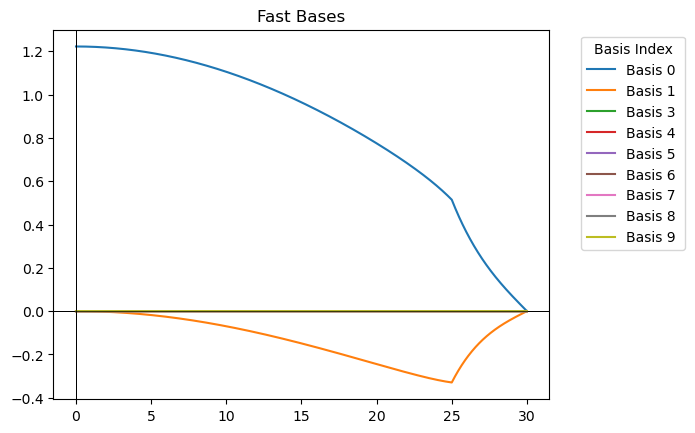

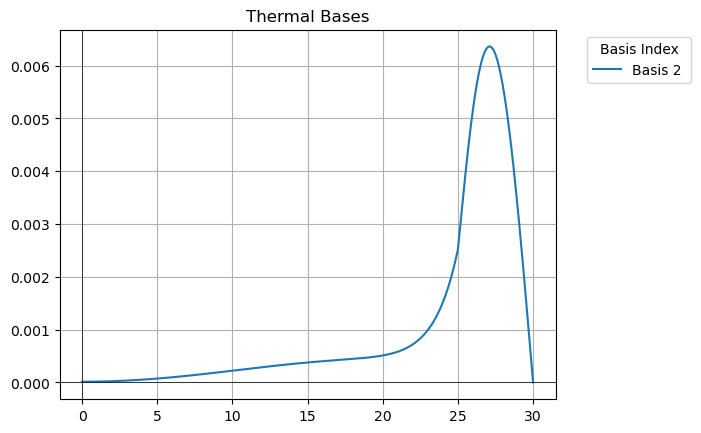

In [8]:
fig0, ax0 = plt.subplots()
fig1, ax1 = plt.subplots()

fast_sensor_count = 0
thermal_sensor_count = 0

for i in range(rank):

    if oneDflux_geim.index_field_basis[i] == 0:
        fast_sensor_count +=1
        ax0.plot(x, oneDflux_geim.matrix_holding_bases[0:Nx, i], label=f"Basis {i} ")
        ax0.axhline(0, color="black", linewidth=0.5)  # Horizontal axis
        ax0.axvline(0, color="black", linewidth=0.5)  # Vertical axis
        ax0.legend(title="Basis Index", bbox_to_anchor=(1.05, 1), loc="upper left")
    else:
        thermal_sensor_count +=1
        ax1.plot(x, oneDflux_geim.matrix_holding_bases[Nx: 2 * Nx, i], label=f"Basis {i} ")
        ax1.axhline(0, color="black", linewidth=0.5)  # Horizontal axis
        ax1.axvline(0, color="black", linewidth=0.5)  # Vertical axis
        ax1.legend(title="Basis Index", bbox_to_anchor=(1.05, 1), loc="upper left")

    ax0.set_title("Fast Bases")
    ax1.set_title("Thermal Bases")

print(f"Thermal sensor count: {thermal_sensor_count}")
print(f"Fast sensor count: {fast_sensor_count}")      
plt.grid()
plt.show()

In [9]:
print(oneDflux_geim.index_field_basis)

[0 0 1 0 0 0 0 0 0 0]


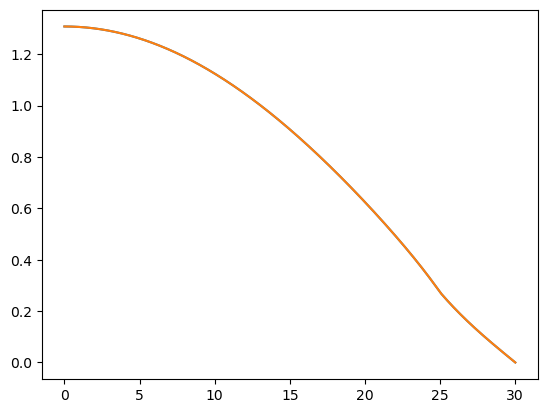

In [18]:
measurements = np.zeros(rank)

for i in range(rank):
    measurements[i] = snapshots[oneDflux_geim.indexes_position_sensors[i], oneDflux_geim.index_field_basis, fixed_test_snap_index]

s = oneDflux_geim.reconstruct_solution(measurements)


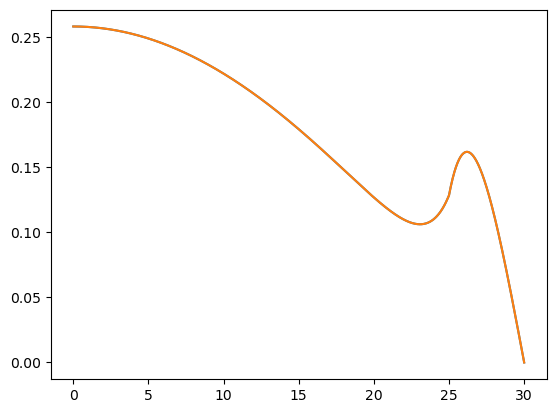

In [19]:
plt.plot(x, s[:,1])
plt.plot(x, snapshots[:,1, fixed_test_snap_index])

In [25]:
A = np.random.randint(low=0, high=100, size=(12, 1))

print(A)

[[53]
 [37]
 [79]
 [78]
 [56]
 [40]
 [41]
 [45]
 [ 9]
 [20]
 [68]
 [42]]


In [26]:
B  = A.reshape((2,6))
print(B)

[[53 37 79 78 56 40]
 [41 45  9 20 68 42]]


In [27]:
C = np.transpose(B,(1,0))

In [28]:
print(C)

[[53 41]
 [37 45]
 [79  9]
 [78 20]
 [56 68]
 [40 42]]
